
# Deep Learning with Python

Welcome to the **Deep Learning** course! This course is designed to give you hands-on experience with the foundational concepts and advanced techniques in deep learning. You will explore:

- Artificial Neural Networks and Gradient Descent
- Convolutional Neural Networks (CNNs) for Computer Vision
- Recurrent Neural Networks (RNNs) for Text Prediction
- Diffusion Transformers for Image Generation

Throughout the course, you'll engage in projects to solidify your understanding and gain practical skills in implementing deep learning algorithms.  

Instructor: Dr. Adrien Dorise  
Contact: adrien.dorise@hotmail.com  

---


In [1]:
import sys
print(sys.executable)

c:\Users\redaf\OneDrive\Bureau\DeepL\Scripts\python.exe


## Part1: Perceptron with Gradient Descent
In this project, you will build a perceptron from scratch and gain a deeper understanding of how gradient descent works in optimizing models. The tasks you will complete include:

1. **Import and Understand a Dataset**: Learn how to load, preprocess, and explore a dataset to prepare it for training.
2. **Implement a Perceptron from Scratch**: Code the perceptron algorithm using only fundamental Python and NumPy.
3. **Implement Gradient Descent**: Incorporate gradient descent to optimize the perceptron's weights.
4. **Evaluate the Model on Simple Logical Functions**: Test your perceptron on logical functions like AND, OR, and XOR to understand their capabilities and limitations.
5. **Evaluate the Model on a Real-World Dataset**: Apply your perceptron to a simple real-world dataset and assess its performance.

By the end of this project, you'll have a solid understanding of how perceptrons work and how gradient descent improves their performance. This foundational knowledge will prepare you for more advanced neural network architectures in subsequent projects.

---

## Dataset

This exercise will start by importing a simple dataset based on AND, OR and XOR logical functions.  
These functions consist of binary inputs and outputs, used for training and testing basic neural network models. 

**AND Dataset**  
The AND operation returns 1 if both inputs are 1, and 0 otherwise.

| Input 1 | Input 2 | Output (AND) |
|---------|---------|--------------|
| 0       | 0       | 0            |
| 0       | 1       | 0            |
| 1       | 0       | 0            |
| 1       | 1       | 1            |

**OR Dataset**  
The OR operation returns 1 if at least one input is 1.

| Input 1 | Input 2 | Output (OR) |
|---------|---------|-------------|
| 0       | 0       | 0           |
| 0       | 1       | 1           |
| 1       | 0       | 1           |
| 1       | 1       | 1           |

**XOR Dataset**  
The XOR operation returns 1 if the inputs are different, and 0 if they are the same.

| Input 1 | Input 2 | Output (XOR) |
|---------|---------|--------------|
| 0       | 0       | 0            |
| 0       | 1       | 1            |
| 1       | 0       | 1            |
| 1       | 1       | 0            |



In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas

## AND dataset
and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_outputs = np.array([[0], [0], [0], [1]])

## OR dataset
or_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
or_outputs = np.array([[0], [1], [1], [1]])

## XOR dataset
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_outputs = np.array([[0], [1], [1], [0]])


# Explore the dataset
for i in range(len(and_inputs)):
    print(f"{and_inputs[i]} -> {and_outputs[i]}")

[0 0] -> [0]
[0 1] -> [0]
[1 0] -> [0]
[1 1] -> [1]


## Create the Perceptron

<img src="../docs/perceptron.jpg" alt="Perceptron" width="500"/>  



You will now have to implement the perceptron from scratch!
It means recreating its function:  
$
\hat{y} = f(\sum_{i=1}^{n}(w_i x_i) + b) = f(w_1x_1 + w_2x_2 +...+w_nx_n +b)
$

It is done by:
 - Implementing the weighted sum
 - Implementing the activation function
 - Creating the perceptron
 - Defining the loss function
 - Implementing the optimisation with gradient descent
    - Weights update
    - Bias update


**Weighted sum**
- Complete the code below to create the weighted sum function.
- It has to take an input vector, a weight vector and a bias value as input. 
- Feel free to experiment with the dataset created before to be sure that your function is working as expected.


In [ ]:
def weighted_sum(x, weights, bias):
    return np.dot(x, weights) + bias
    #return sum(w * xi for w, xi in zip(weights, x)) + bias

weighted_sum(and_inputs, np.array([0.1, 0.3]), 0.5)

array([0.5, 0.8, 0.6, 0.9])

**Activation function**
- Complete the code below to create the activation function
- You can choose whatever activation function you want. 
- Be careful, as the step function has no gradient.
- Sigmoid or ReLu functions seem to be a good fit!   
$
ReLU(x) = 
\begin{cases} 
	w, & \text{if } x > 0 \\
	0, & \text{if } x \leq 0
\end{cases}
$  
$
\sigma(x) = \frac{1}{1+e^{-x}}
$

In [9]:

# activation_functions

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0,x)

**Perceptron**
- Complete the code below to create the forward function of your percetron.
- feel free to test with the dummy data!

In [ ]:
dummy_x = [1,2,3,4]
dummy_weights = [2,1,0,-1]
dummy_bias = 0.5

def predict(x, weights, bias):
    ws = weighted_sum(x, weights, bias)
    return sigmoid(ws)

print(f"weights = {dummy_weights}")
print(f"bias = {dummy_bias}")
print(f"inputs = {dummy_x}")
print(f"weighted sum = {weighted_sum(dummy_x, dummy_weights, dummy_bias)}")   
print(f"prediction = {predict(dummy_x, dummy_weights, dummy_bias)}")


weights = [2, 1, 0, -1]
bias = 0.5
inputs = [1, 2, 3, 4]
weighted sum = 0.5
prediction = 0.6224593312018546


**Loss function** 
- Complete the code below to create your custom loss function.
- You will have to make a function that calculates the loss of a single sample, and a function that takes a batch of samples as input
- The L2 loss is a good start:  
$
\mathcal{L}(\hat{y},y) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$


In [11]:
# TODO

def compute_loss_sample(prediction, target):
    return (prediction - target) ** 2

def compute_loss_batch(predictions, targets):
    return np.mean((predictions - targets) ** 2)

**Gradient**  
The gradient update is a formula of the form:  
$ \theta_i \leftarrow \theta_i - \alpha \nabla_{\theta_i} J(\theta_i) $

- Complete the code below to compute the gradient of the loss function $\nabla_{\theta_i} \mathcal{L}_{\theta_i}$ 
    - in regards to the weights
    - in regards to the bias
- You will have to return the gradient for each weight in your perceptron as a vector.
- **Be careful to include the derivative of your activation function!**
  - Create a function to compute the derivative in regards to the weighted some *z*.
- If you are lost, go back to part 1 of the course.
    - Get back to the slides 38->48

In [12]:
inputs = and_inputs
targets = and_outputs
weights = [2,-1]
bias = 0.5

def derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def gradient_weights(inputs, targets, weights, bias):
    dw = np.zeros(len(weights))
    
    for x, y in zip(inputs, targets):
        z = weighted_sum(x, weights, bias)
        a = sigmoid(z)
        dz = (a - y) * derivative(z)
        dw += dz * np.array(x)
    
    return dw / len(inputs)

def gradient_bias(inputs, targets, weights, bias):
    db = 0
    
    for x, y in zip(inputs, targets):
        z = weighted_sum(x, weights, bias)
        a = sigmoid(z)
        dz = (a - y) * derivative(z)
        db += dz
    
    return db / len(inputs)


**Gradient Descent**
Now that you have computed the gradient, you can perform the gradient descent!
- You have to perform the full parameters updates using what you created.
    - Get data from the dataset
    - Predict new value with your model
    - Compute the gradient
    - Update the parameters
    - Return the final parameters
    - *Compute the loss of the epoch, to verify that the model is learning*
        - Return a list of the losses for each epoch
- Recall the gradient update function if needed
    - Make use of the learning parameter $\alpha$.
- The gradient descent is an iterative algorithm
    - Loop the algorithm until you reach a set number of iterations.


In [ ]:
# Fit function to train the perceptron using gradient descent
def fit(inputs, targets, weights, bias, alpha, max_iter):
    losses = []
    
    for epoch in range(max_iter):
        # Compute gradients
        dw = gradient_weights(inputs, targets, weights, bias)
        db = gradient_bias(inputs, targets, weights, bias)

        # Update weights and bias
        weights -= alpha * dw
        bias -= alpha * db

        # Compute loss (Binary Cross-Entropy)
        loss = -np.mean(targets * np.log(sigmoid(weighted_sum(inputs,weights,bias))) +
                        (1 - targets) * np.log(1 - sigmoid(weighted_sum(inputs,weights,bias))))
        losses.append(loss)

        # Print progress every 50 epochs
        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return weights, bias, losses

inputs = and_inputs
targets = and_outputs
weights = [2,-1]
bias = 0.5
alpha = 0.05
n_epoch = 200
w,b,l = fit(inputs, targets, weights, bias, alpha, n_epoch)
print(f"weights: {w} / bias: {b} / loss: {l[-1]}")

Epoch 0: Loss = 1.1804
Epoch 50: Loss = 1.0995
Epoch 100: Loss = 1.0316
Epoch 150: Loss = 0.9748
Epoch 200: Loss = 0.9271
Epoch 250: Loss = 0.8867
Epoch 300: Loss = 0.8523
Epoch 350: Loss = 0.8228
Epoch 400: Loss = 0.7972
Epoch 450: Loss = 0.7749
Epoch 500: Loss = 0.7554
Epoch 550: Loss = 0.7382
Epoch 600: Loss = 0.7232
Epoch 650: Loss = 0.7100
Epoch 700: Loss = 0.6985
Epoch 750: Loss = 0.6884
Epoch 800: Loss = 0.6797
Epoch 850: Loss = 0.6722
Epoch 900: Loss = 0.6658
Epoch 950: Loss = 0.6604
Epoch 1000: Loss = 0.6558
Epoch 1050: Loss = 0.6520
Epoch 1100: Loss = 0.6489
Epoch 1150: Loss = 0.6463
Epoch 1200: Loss = 0.6443
Epoch 1250: Loss = 0.6428
Epoch 1300: Loss = 0.6416
Epoch 1350: Loss = 0.6408
Epoch 1400: Loss = 0.6404
Epoch 1450: Loss = 0.6401
Epoch 1500: Loss = 0.6402
Epoch 1550: Loss = 0.6404
Epoch 1600: Loss = 0.6408
Epoch 1650: Loss = 0.6414
Epoch 1700: Loss = 0.6422
Epoch 1750: Loss = 0.6430
Epoch 1800: Loss = 0.6440
Epoch 1850: Loss = 0.6450
Epoch 1900: Loss = 0.6462
Epoch 195

**Plot results**

Now that your model is working fine, you can plot the result to verify the training
- Compute the losses for the three dataset AND, OR and XOR.
- Use matplotlib to plot the three losses on a single figure.
- Conclude on the results.

Epoch 0: Loss = 0.6487
Epoch 50: Loss = 0.6500
Epoch 100: Loss = 0.6514
Epoch 150: Loss = 0.6529
Epoch 200: Loss = 0.6544
Epoch 250: Loss = 0.6559
Epoch 300: Loss = 0.6575
Epoch 350: Loss = 0.6590
Epoch 400: Loss = 0.6607
Epoch 450: Loss = 0.6623
Epoch 500: Loss = 0.6639
Epoch 550: Loss = 0.6656
Epoch 600: Loss = 0.6673
Epoch 650: Loss = 0.6690
Epoch 700: Loss = 0.6707
Epoch 750: Loss = 0.6724
Epoch 800: Loss = 0.6741
Epoch 850: Loss = 0.6759
Epoch 900: Loss = 0.6776
Epoch 950: Loss = 0.6793
Epoch 1000: Loss = 0.6811
Epoch 1050: Loss = 0.6828
Epoch 1100: Loss = 0.6845
Epoch 1150: Loss = 0.6863
Epoch 1200: Loss = 0.6880
Epoch 1250: Loss = 0.6898
Epoch 1300: Loss = 0.6915
Epoch 1350: Loss = 0.6933
Epoch 1400: Loss = 0.6950
Epoch 1450: Loss = 0.6967
Epoch 1500: Loss = 0.6985
Epoch 1550: Loss = 0.7002
Epoch 1600: Loss = 0.7019
Epoch 1650: Loss = 0.7037
Epoch 1700: Loss = 0.7054
Epoch 1750: Loss = 0.7071
Epoch 1800: Loss = 0.7088
Epoch 1850: Loss = 0.7105
Epoch 1900: Loss = 0.7122
Epoch 195

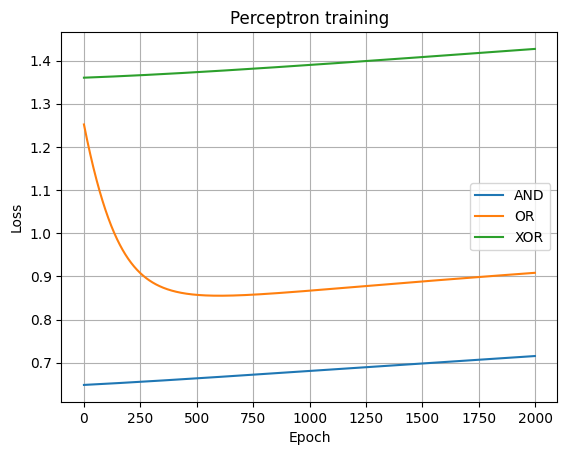

In [18]:
def plot_losses(loss_and, loss_or, loss_xor):
    plt.plot(loss_and, label='AND')
    plt.plot(loss_or, label='OR')
    plt.plot(loss_xor, label='XOR')
    plt.xlabel('Epoch')
    plt.ylabel("Loss")
    plt.title("Perceptron training")
    plt.grid(True)
    plt.legend()
    plt.show()

# TODO

# Train models
_, _, loss_and = fit(and_inputs, and_outputs, w, b, alpha, n_epoch)
_, _, loss_or = fit(or_inputs, or_outputs, w, b, alpha, n_epoch)
_, _, loss_xor = fit(xor_inputs, xor_outputs, w, b, alpha, n_epoch)

# Plot losses
plot_losses(loss_and, loss_or, loss_xor)

# BONUS

Now that you have a perfect understanding of the perceptron and its limitations, you can try your algorithm on real-world datasets!
Below are some examples that you can get from sklearn or the *Kaggle* website.

**Iris Dataset (Binary Subset)**  
Description: The Iris dataset is a classic dataset in machine learning. You can use only two classes (e.g., Setosa and Versicolor) and two features (e.g., sepal length and width) to make it linearly separable.

**Breast Cancer Dataset**  
Description: A dataset for binary classification, differentiating between malignant and benign tumors.

**Titanic Dataset**  
Description: A dataset to predict survival on the Titanic. Simplify it by selecting features like Pclass, Age, and Sex and treat survival as the target.

**Pima Indians Diabetes Dataset**  
Description: A dataset to predict the onset of diabetes based on diagnostic measures like glucose concentration, blood pressure, and BMI.

*Kaggle is your go-to community for data science. It has tons of public datasets and challenges to help you improve.*

**Your job**
- Train your perceptron on one of these datasets.
- Try to get the best possible model by varying the hyperparameters
- Analyse if the perceptron is limited due to its non-linearity (try to plot the data, or compare with non-linear models if you know some)
- Conclude


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Utility Function: Scale Features
def scale_features(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Iris Dataset (Binary Subset)
def load_iris_dataset():
    iris = load_iris()
    mask = iris.target != 2  # Exclude the third class (Virginica)
    X = iris.data[mask, :2]  # Only first two features
    y = iris.target[mask]
    return X, y

# Breast Cancer Dataset
def load_breast_cancer_dataset():
    data = load_breast_cancer()
    X = data.data
    y = data.target
    return X, y

# Titanic Dataset
def load_titanic_dataset():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url)
    # Select features: Pclass, Age, Sex
    df = df[['Pclass', 'Age', 'Sex', 'Survived']].dropna()
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Convert categorical to numeric
    X = df[['Pclass', 'Age', 'Sex']].values
    y = df['Survived'].values
    return X, y

# Pima Indians Diabetes Dataset
def load_pima_diabetes_dataset():
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
    columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
               'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
    dataset = pd.read_csv(url, names=columns)
    X = dataset.iloc[:, :-1].values
    y = dataset['Outcome'].values
    return X, y



In [ ]:
# Example Usage

# Iris dataset
X, y = load_iris_dataset()
X = scale_features(X)
print("\nIris dataset loaded and scaled.")
print("Train shape:", X.shape)
print(f"First samples: {X[0]} -> {y[0]}")

# Breast Cancer dataset
X, y = load_breast_cancer_dataset()
X = scale_features(X)
print("\nBreast Cancer dataset loaded and scaled.")
print("Train shape:", X.shape)
print(f"First samples: {X[0]} -> {y[0]}")

# Titanic dataset
X, y = load_titanic_dataset()
X = scale_features(X)
print("\nTitanic dataset loaded and scaled.")
print("Train shape:", X.shape)
print(f"First samples: {X[0]} -> {y[0]}")

# Pima Diabetes dataset
X, y = load_pima_diabetes_dataset()
X = scale_features(X)
print("\nPima Diabetes dataset loaded and scaled.")
print("Train shape:", X.shape)
print(f"First samples: {X[0]} -> {y[0]}")